## Linear Regression 

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

In [105]:
# setting up datasets
df = pd.read_csv("Experience-Salary.csv")

In [106]:
#visualizing data
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [107]:
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [108]:
df.count()
# This implies that no null values are present

exp(in months)          1000
salary(in thousands)    1000
dtype: int64

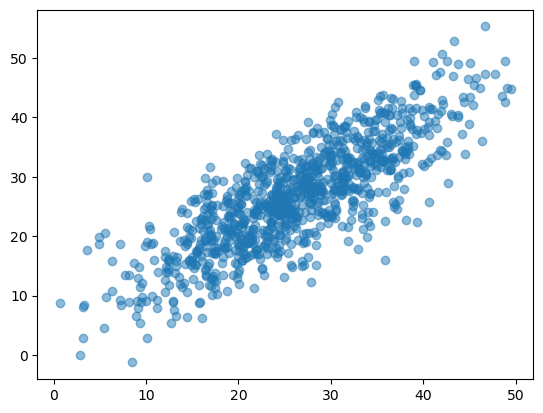

c:\Users\Sundram\Anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


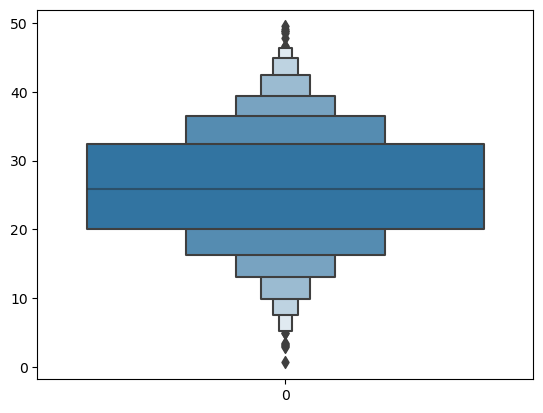

In [109]:

plt.scatter(df["exp(in months)"],df["salary(in thousands)"],alpha=0.5)
plt.show()

sns.boxenplot(df["exp(in months)"])
plt.show()

In [110]:
# lets prepare variables for training and testing
train_input = (np.array(df.iloc[:700,:1])).reshape(700,1)
train_output = (np.array(df.iloc[:700,1:2])).reshape(700,1)

# data for prediction

test_input = (np.array(df.iloc[700:1000,:1])).reshape(300,1)
test_output = (np.array(df.iloc[700:1000,1:2])).reshape(300,1)

### Linear Regression functions


#### Forward Propagation

In [111]:
def forward_propagation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]

    predicted = np.multiply(m,train_input)+c
    return predicted

#### Cost function

In [112]:
def cost_function(predicted , train_output):
    cost = np.mean((predicted - train_output)**2) * 0.5
    return cost

#### Gradient descent for Backward Propagation

In [113]:
def gradient_descent(train_input, train_output, predicted):
    m = len(train_input)
    df = predicted - train_output
    
    dm = (2/m) * np.sum(train_input * df)
    dc = (2/m) * np.sum(df)
    
    derivative = {
        "dm": dm,
        "dc": dc
    }
    return derivative

#### Updating the value of m and c

In [114]:
def update_parameters(parameters , derivative , learning_rate):
    parameters["m"]  = parameters["m"] - learning_rate * derivative["dm"]
    parameters["c"]  = parameters["c"] - learning_rate * derivative["dc"]

    return parameters

### Training the Model

In [115]:
def train(train_input,train_output ,learning_rate,iter):

    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    loss = list()

    for _ in range(iter):

        # predicted value y' = mx+c
        predicted = forward_propagation(train_input,parameters)

        #cost function / error calculation
        cost = cost_function(predicted , train_output)
        loss.append(cost)
        print(f"Number of iteration ={iter}        cost = {cost}")

        fig,ax = plt.subplots()
        
        ax.plot(train_input , train_output ,"*" , label = "Original",alpha = 0.5 )
        ax.plot(train_input , predicted , "x" , label = "Predictes")
        legend = ax.legend()
        plt.plot(train_input , train_output ,"*" , label = "Original")
        plt.plot(train_input , predicted , "x" , label = "Predictes")
        plt.show()


        #derivatives for readjusting parameters
        derivatives = gradient_descent(train_input ,train_output ,predicted)

        #updating parameters
        parameters = update_parameters(parameters , derivatives , learning_rate)


    return parameters , cost

### Training

Number of iteration =25        cost = 176.4531039779328


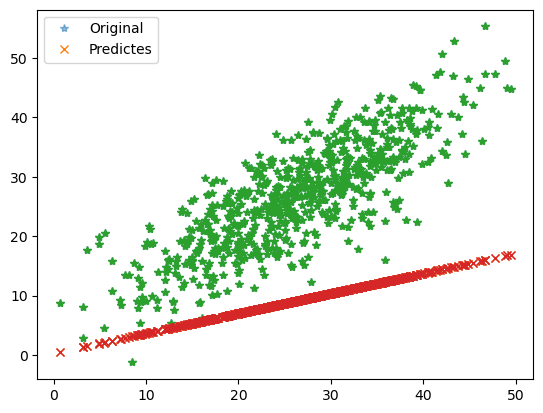

Number of iteration =25        cost = 131.0615516617853


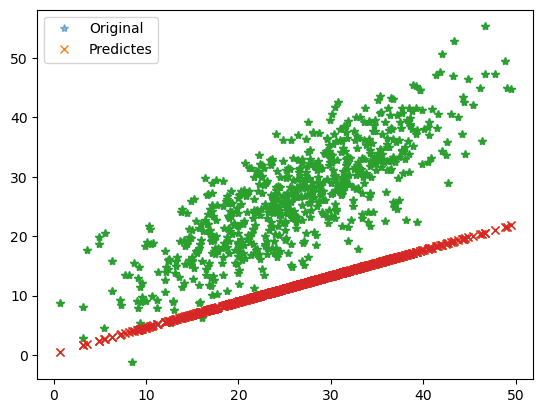

Number of iteration =25        cost = 98.42016940851946


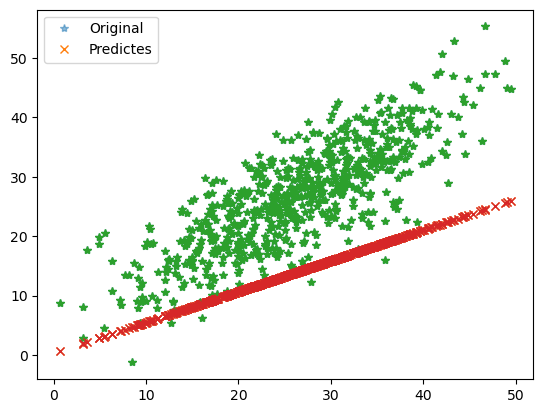

Number of iteration =25        cost = 74.94751911383148


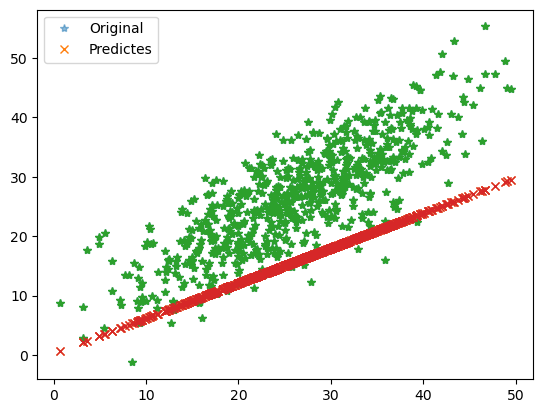

Number of iteration =25        cost = 58.06816485487559


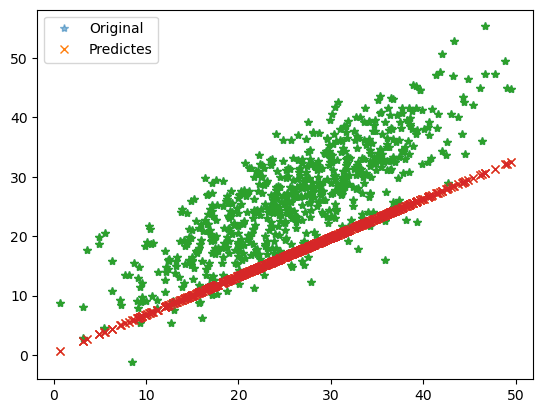

Number of iteration =25        cost = 45.93009355770997


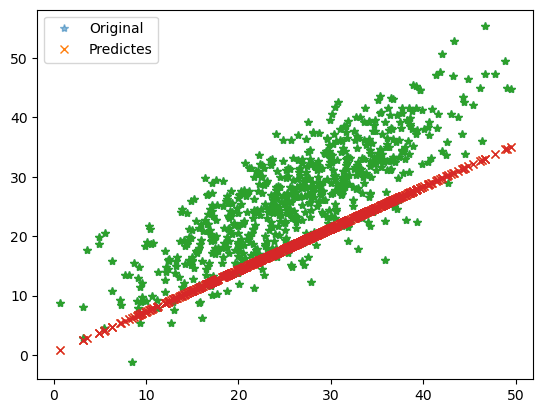

Number of iteration =25        cost = 37.201510322828284


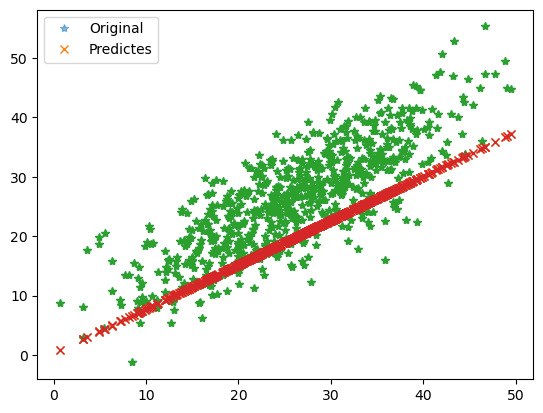

Number of iteration =25        cost = 30.924712594396915


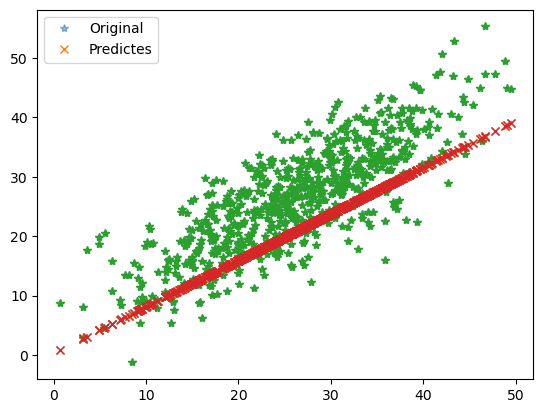

Number of iteration =25        cost = 26.41101010502559


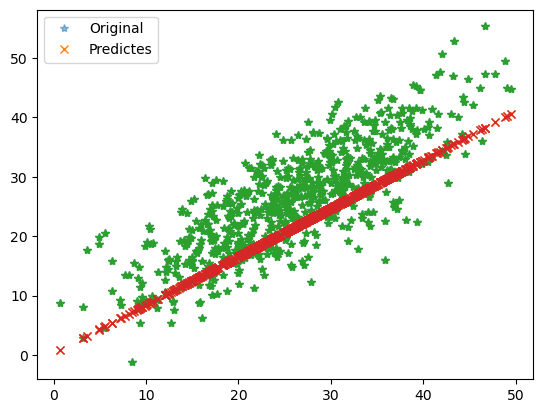

Number of iteration =25        cost = 23.165161110282106


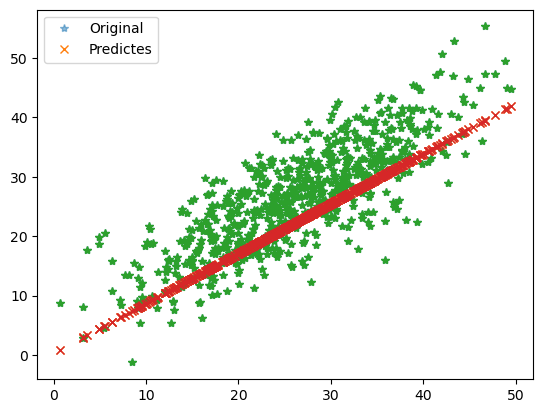

Number of iteration =25        cost = 20.831033983161458


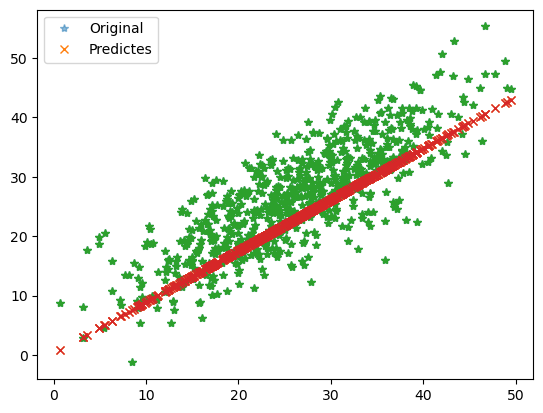

Number of iteration =25        cost = 19.15253210584186


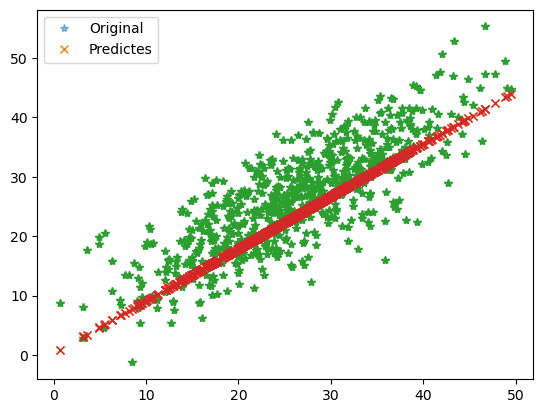

Number of iteration =25        cost = 17.945494699873723


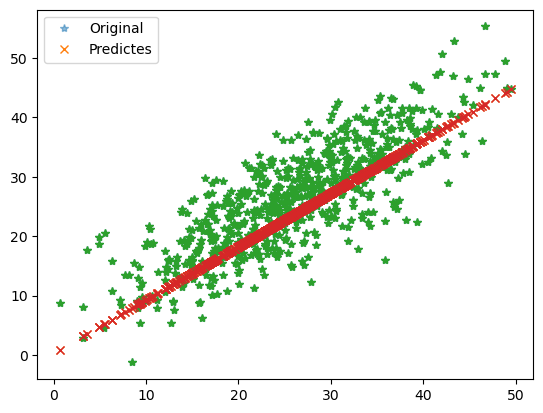

Number of iteration =25        cost = 17.07749052657994


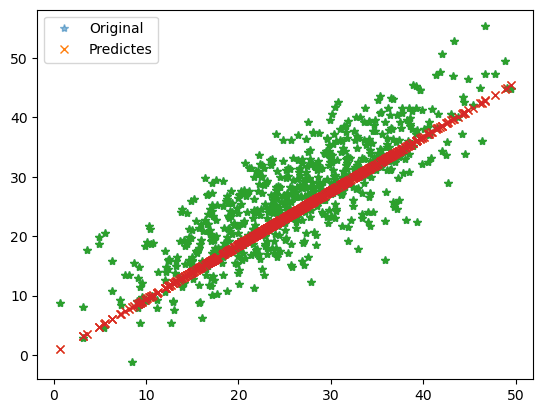

Number of iteration =25        cost = 16.45328740283658


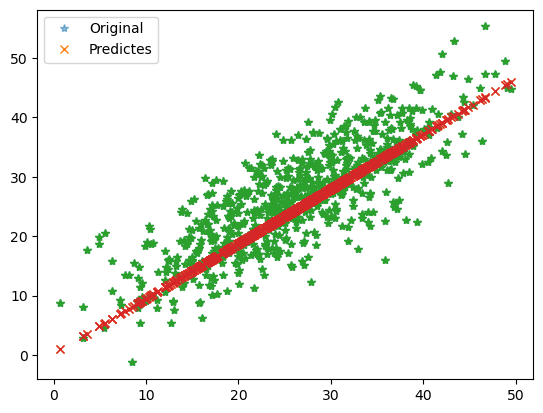

Number of iteration =25        cost = 16.004403233383165


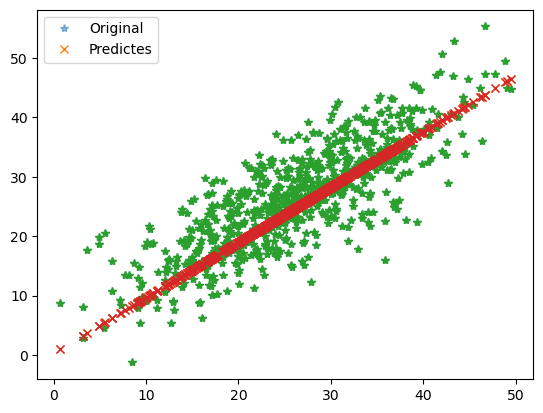

Number of iteration =25        cost = 15.681592088772028


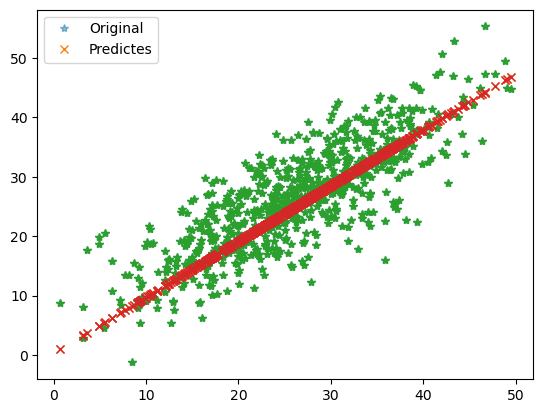

Number of iteration =25        cost = 15.449440894126612


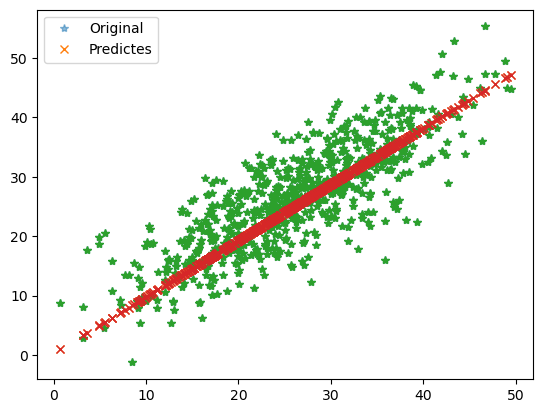

Number of iteration =25        cost = 15.282483872147562


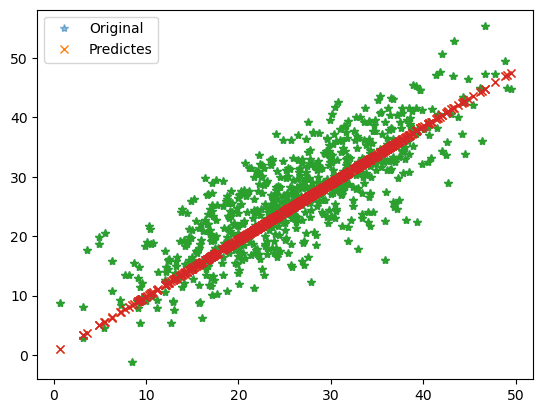

Number of iteration =25        cost = 15.162408413276935


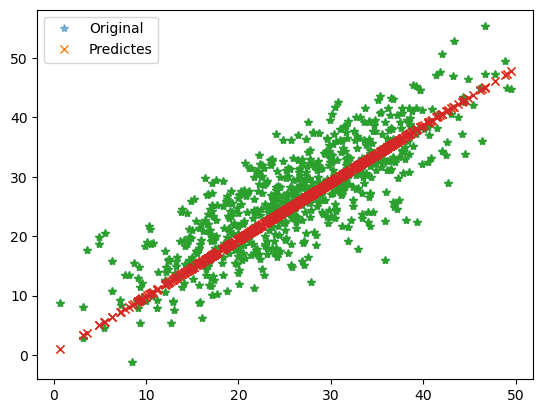

Number of iteration =25        cost = 15.076045798379267


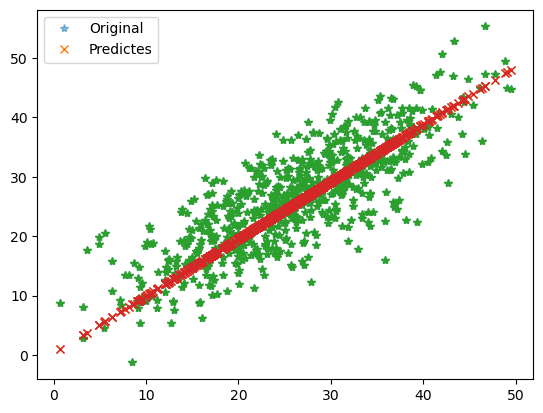

Number of iteration =25        cost = 15.01392631407916


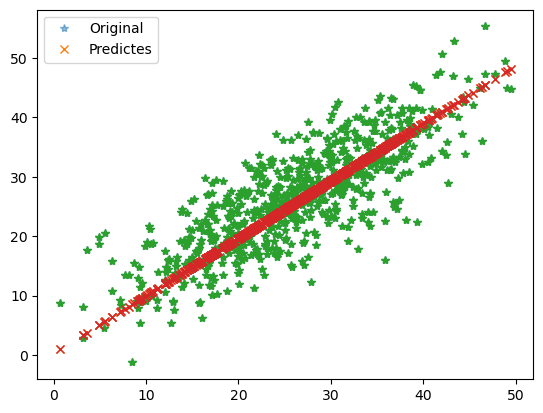

Number of iteration =25        cost = 14.969240226606047


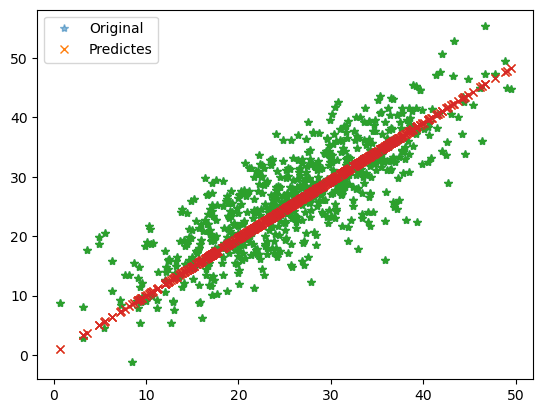

Number of iteration =25        cost = 14.93709061118638


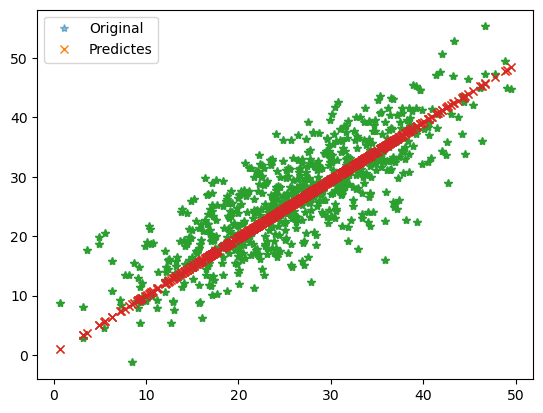

Number of iteration =25        cost = 14.913956056698142


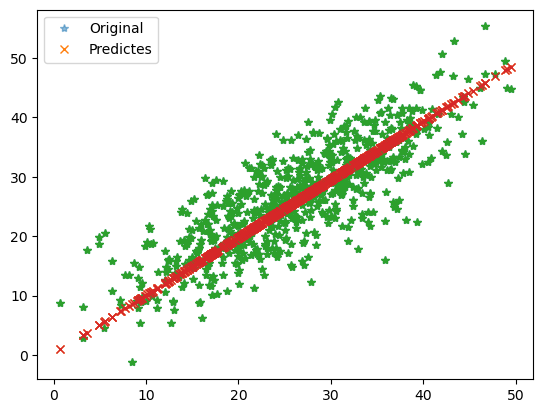

In [130]:
parameter , cost = train(train_input , train_output , 0.0001 , 25)

#### Lets check the accuracy of our model

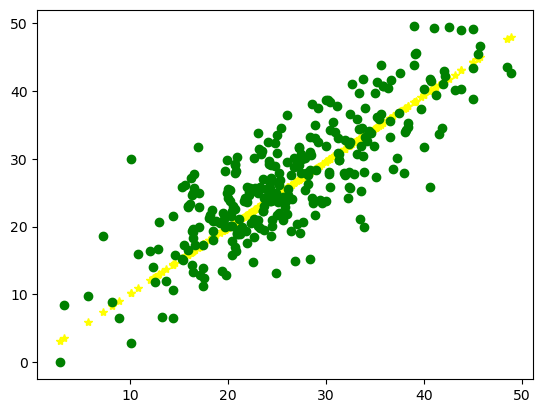

In [132]:
# parameter["m"]
test_prediction = np.multiply(parameter["m"],test_input) + parameter["c"]
plt.plot(test_input,test_prediction,"*",color= "yellow")
plt.plot(test_input , test_output,"o",color = "green")
plt.show()